<a href="https://colab.research.google.com/github/mohamed-malk/heart-failure-prediction/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('mydrive')

Mounted at mydrive


In [73]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as py 
import seaborn as sb

from sklearn.feature_selection import  mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
from tensorflow.keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix

In [3]:
tf.debugging.set_log_device_placement(False)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")    
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPU


In [4]:
dataset = pd.read_csv('/content/mydrive/MyDrive/Pi Diploma. C-E/Session 3/Tasks/heart.csv')
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# New Section

In [ ]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


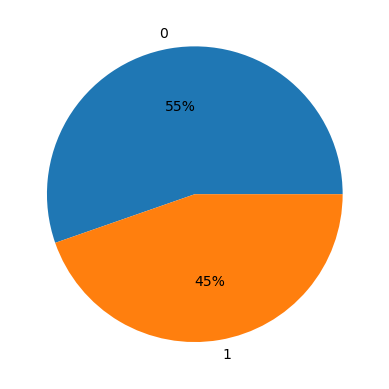

In [ ]:
py.pie(dataset.HeartDisease.value_counts(),
       labels=dataset.HeartDisease.unique(), autopct='%.0f%%')
py.show()

> The data is **balanced**

<AxesSubplot:xlabel='Age', ylabel='Density'>

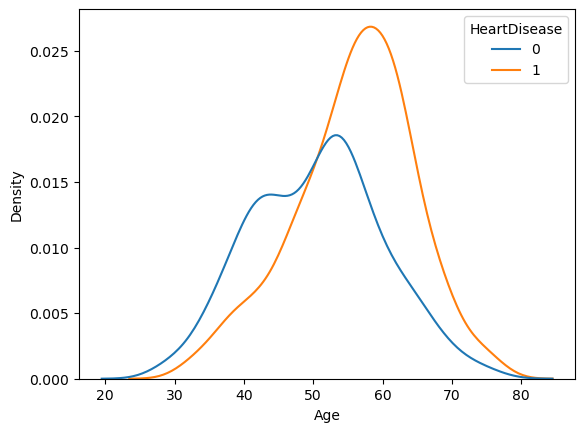

In [ ]:
sb.kdeplot(x=dataset.Age, hue=dataset.HeartDisease)

> The **Age** distribution is good, especially in the case of class ***1***, but it cannot separate the two classes well. There may be another feature that helps it separate them well. 

<AxesSubplot:xlabel='Sex', ylabel='count'>

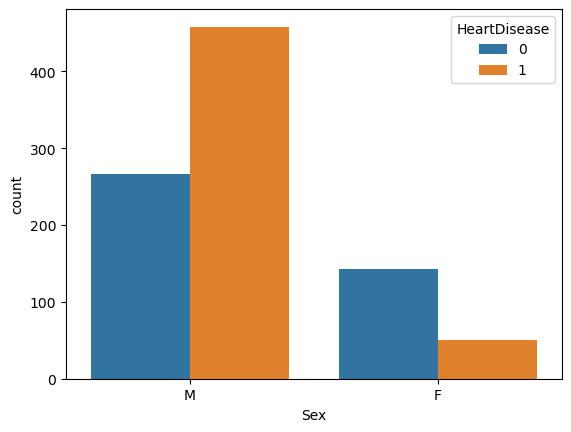

In [ ]:
sb.countplot(x=dataset.Sex, hue=dataset.HeartDisease)

> **Males** have *Heart disease* more, unlike **Females**. 

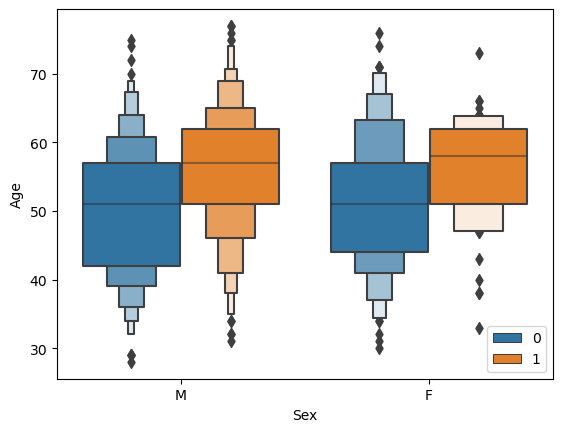

In [ ]:
sb.boxenplot(x=dataset.Sex, y=dataset.Age, hue=dataset.HeartDisease)

> From above The people have ***Heart Disease***, their **Age** is high `(~ above 55)`. 

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

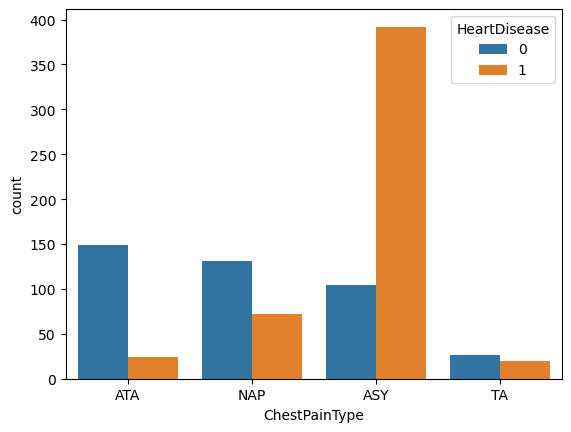

In [ ]:
sb.countplot(x=dataset.ChestPainType, hue=dataset.HeartDisease)

> The cases that **ChestPainType** is ***ASY***, tend to have ***Heart Disease***, unlike other **ChestPainType**.

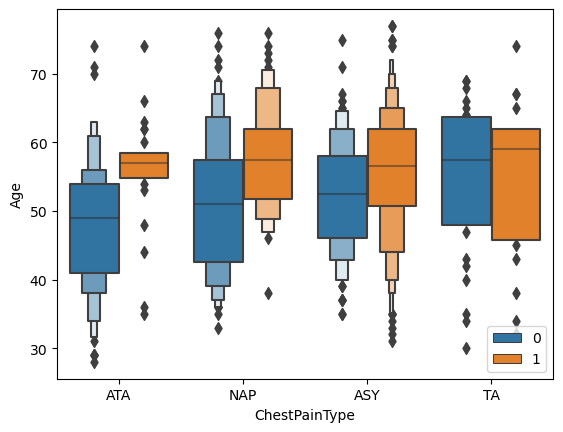

In [ ]:
sb.boxenplot(x=dataset.ChestPainType, y=dataset.Age, hue=dataset.HeartDisease)
py.legend(loc='lower right')

> This plot confirms on the information that the cases that have *high* **Age** tend to have ***Heart Disease***. 
>
> **Age** in *ATA* seperate the cases in good way, and in *NAP* & *ASY* in way enough to be good, but in *TA* can't seperate.

<AxesSubplot:xlabel='RestingBP', ylabel='Density'>

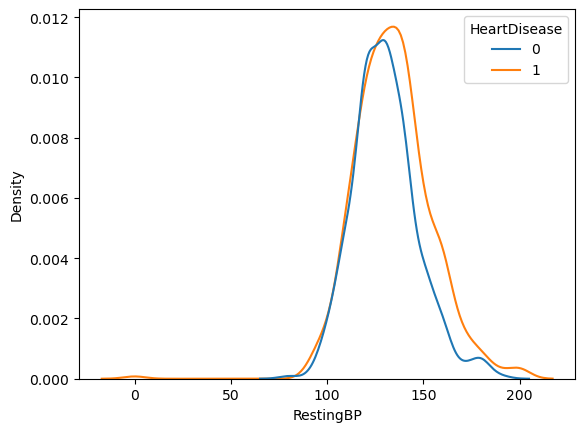

In [ ]:
sb.kdeplot(x=dataset.RestingBP, hue=dataset.HeartDisease)

> The **RestingBP** distribution is good, but can't **distinguish** between 2-classes, 
>
> exept the cases that have low **RestingBP** `(~ less 75)` have ***Heart Disease*** and these samples are very few, may be outlier .

<AxesSubplot:xlabel='RestingBP'>

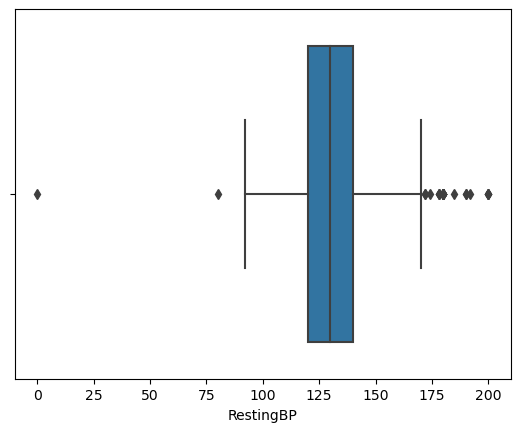

In [ ]:
sb.boxplot(x=dataset.RestingBP)

> Actually, these samples are outliers

<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

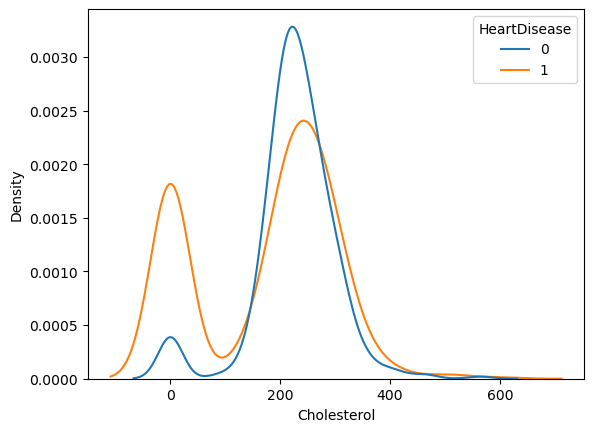

In [ ]:
sb.kdeplot(x=dataset.Cholesterol, hue=dataset.HeartDisease)

> The **Cholesterol** distribution is so bad, and can't **distinguish** between 2-classes.

<AxesSubplot:xlabel='FastingBS', ylabel='Density'>

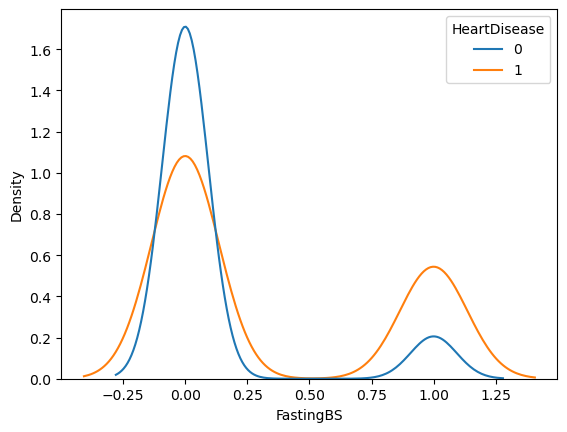

In [ ]:
sb.kdeplot(x=dataset.FastingBS, hue=dataset.HeartDisease)

> The **FastingBS** distribution is bad, and can't **distinguish** between 2-classes.

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

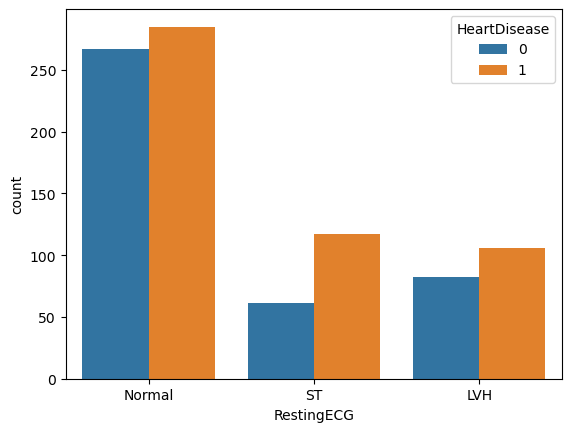

In [ ]:
sb.countplot(x=dataset.RestingECG, hue=dataset.HeartDisease)

> The cases in each category in **RestingECG** is approximately balanced between 2-classes.
>
> The cases have ***HeartDisease*** is high. may other feature with **RestingECG**.

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

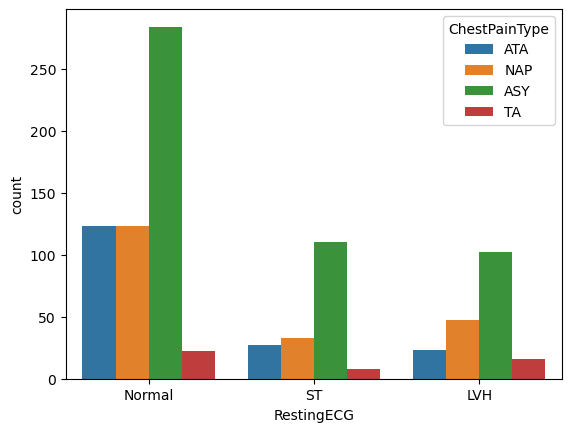

In [ ]:
sb.countplot(x=dataset.RestingECG, hue=dataset.ChestPainType)

> the **ASY** is frequent in all categories, and the most cases in **ASY** have ***Heart Disease***. 
> 
> This may be explain why the ***HeartDisease*** is frequent in all categories of **RestingECG**.

<AxesSubplot:xlabel='MaxHR', ylabel='Density'>

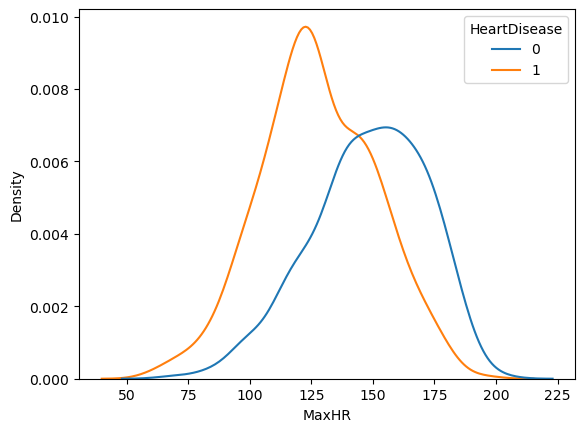

In [ ]:
sb.kdeplot(x=dataset.MaxHR, hue=dataset.HeartDisease)

> The **MaxHR** distribution is good, but it cannot separate the two classes well. There may be another feature that helps it separate them well. 

<AxesSubplot:xlabel='ChestPainType', ylabel='MaxHR'>

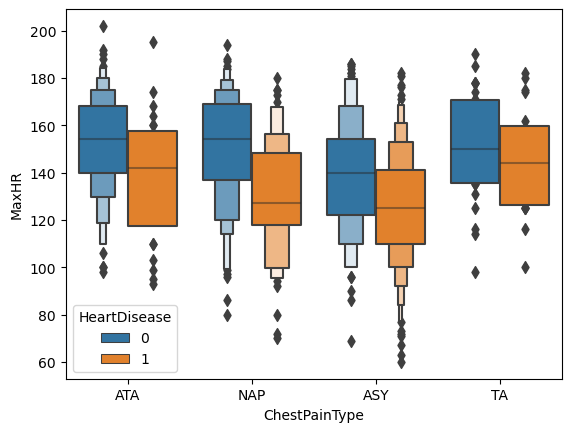

In [ ]:
sb.boxenplot(x=dataset.ChestPainType, y=dataset.MaxHR, hue=dataset.HeartDisease)

> From above The cases have ***Heart Disease***, their **MaxHR** is lower than cases that don't have ***Heart Disease***. 

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

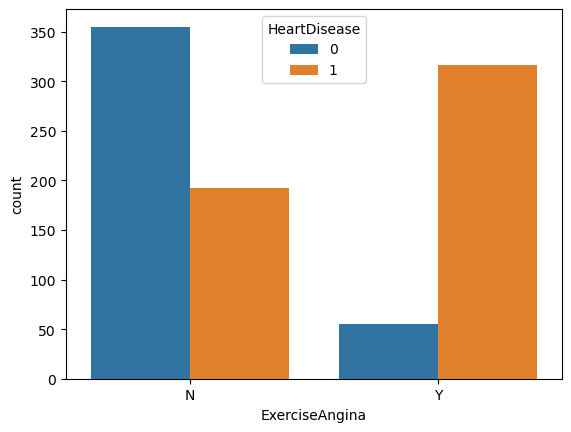

In [ ]:
sb.countplot(x=dataset.ExerciseAngina, hue=dataset.HeartDisease)

> Tاhe cases that have **ExerciseAngina** are more likely to develop ***Heart Disease***.

<AxesSubplot:xlabel='Oldpeak', ylabel='Density'>

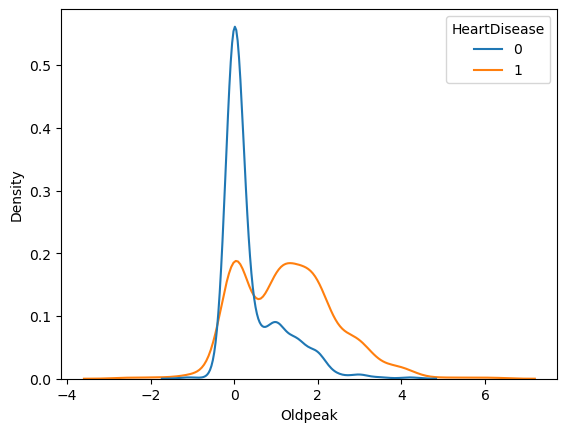

In [ ]:
sb.kdeplot(x=dataset.Oldpeak, hue=dataset.HeartDisease)

> The **Oldpeak** disteribution is not good.

<AxesSubplot:xlabel='RestingECG', ylabel='Oldpeak'>

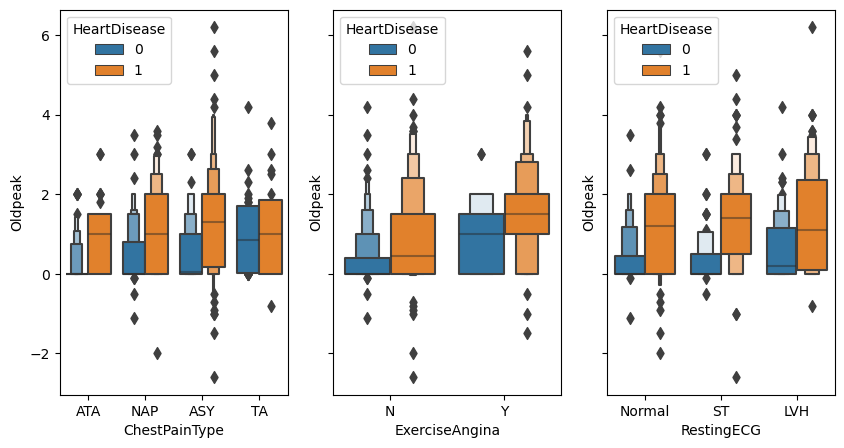

In [ ]:
_, axs = py.subplots(1,3, figsize=(10,5), sharey=True)
sb.boxenplot(x=dataset.ChestPainType, y=dataset.Oldpeak, hue=dataset.HeartDisease, ax=axs[0])
sb.boxenplot(x=dataset.ExerciseAngina, y=dataset.Oldpeak, hue=dataset.HeartDisease, ax=axs[1])
sb.boxenplot(x=dataset.RestingECG, y=dataset.Oldpeak, hue=dataset.HeartDisease, ax=axs[2])

> the **Oldpeak** can't **distinguish**, and also with these features between 2-classes.

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

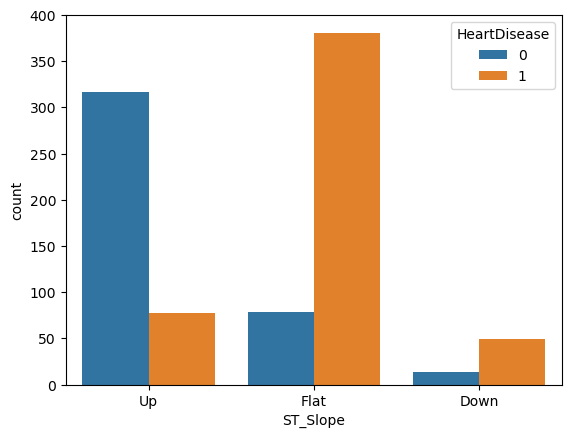

In [ ]:
sb.countplot(x=dataset.ST_Slope, hue=dataset.HeartDisease)

> The cases that have ***Up*** **ST_Slope** tend not to have ***Heart Disease***. ulike The cases that have ***Flat & Down*** **ST_Slope** tend to have ***Heart Disease***.

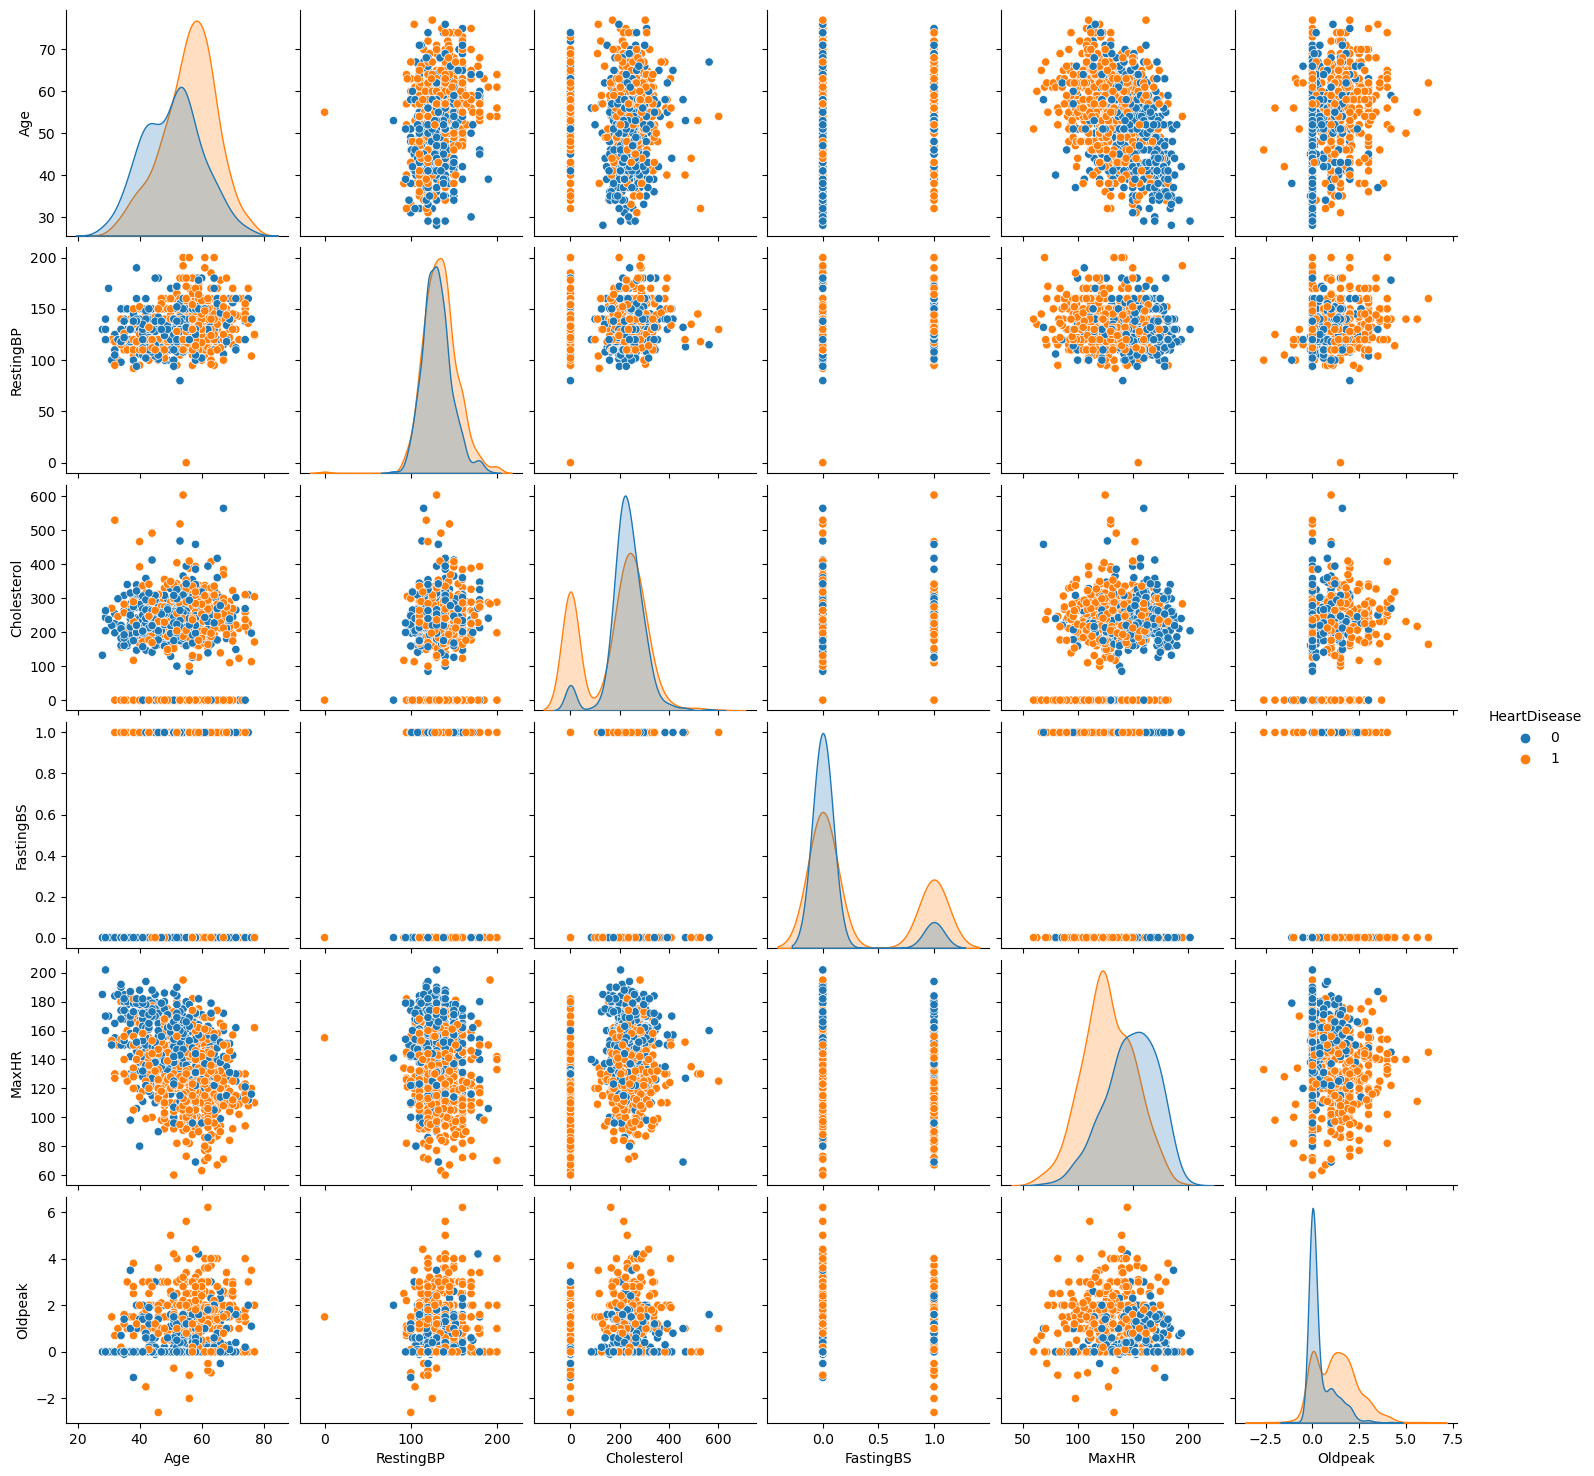

In [ ]:
sb.pairplot(dataset, hue='HeartDisease')

# New Section

In [5]:
x = dataset[['Sex', 'Age', 'ChestPainType', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'ST_Slope']]
y = dataset['HeartDisease']

In [6]:
x = pd.get_dummies(x, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

In [ ]:
x.head(5)

,Age,MaxHR,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,172,1,1,0,0,1,0,0,0,1
1,49,156,0,0,1,0,1,0,0,1,0
2,37,98,1,1,0,0,0,1,0,0,1
3,48,108,0,0,0,0,1,0,1,1,0
4,54,122,1,0,1,0,1,0,0,0,1


<AxesSubplot:>

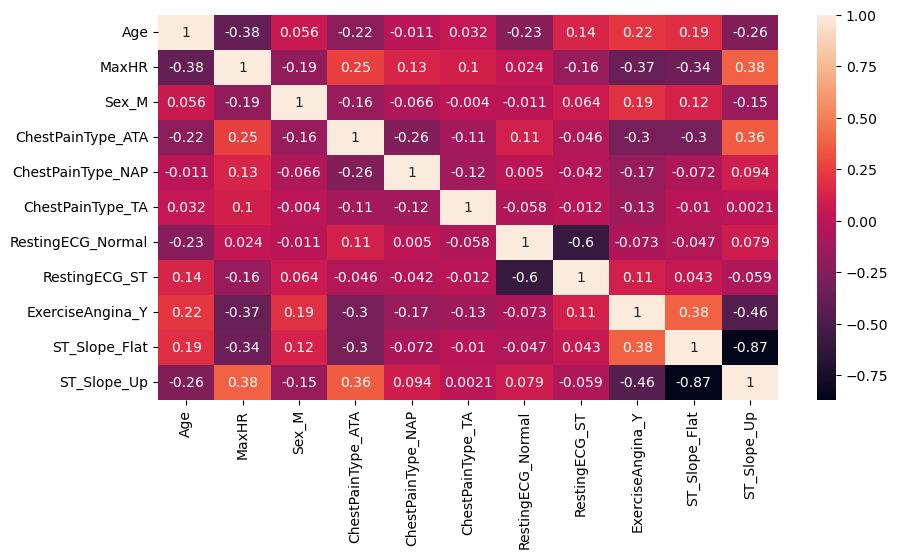

In [ ]:
py.figure(figsize=(10,5))
sb.heatmap(x.corr(), annot=True)

In [ ]:
def make_mi_scores(x, y):
    mi_scores = mutual_info_classif(x, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    py.barh(width, scores)
    py.yticks(width, ticks)
    py.title("Mutual Information Scores")

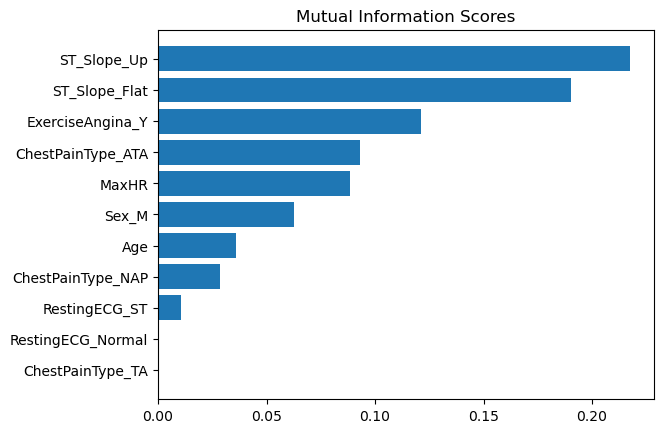

In [ ]:
plot_mi_scores(make_mi_scores(x,y))

In [13]:
Random_State = 45
Input_Shape = (x.shape[1], )
Batch_Size = 32
Epochs = 100

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=Random_State)

In [9]:
scaler = StandardScaler()

x_train.Age = scaler.fit_transform(x_train.Age.values.reshape(-1,1))
x_test.Age = scaler.transform(x_test.Age.values.reshape(-1,1))

x_train.MaxHR = scaler.fit_transform(x_train.MaxHR.values.reshape(-1,1))
x_test.MaxHR = scaler.transform(x_test.MaxHR.values.reshape(-1,1))

In [ ]:
x_train

,Age,MaxHR,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
164,-0.174268,0.144691,0,1,0,0,1,0,0,0,1
745,0.994371,1.281607,0,0,0,0,1,0,1,1,0
23,-1.024187,0.536731,1,1,0,0,1,0,1,1,0
808,-1.980347,0.771955,1,0,0,0,0,0,1,0,1
622,0.569411,0.223099,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
607,-0.068028,-0.325756,1,0,0,0,0,1,1,1,0
544,0.781891,-0.639388,0,1,0,0,1,0,1,0,1
892,-1.555387,0.615139,0,0,1,0,1,0,0,1,0
643,0.463171,1.124791,1,0,1,0,0,0,0,1,0


In [69]:
lg = LogisticRegression(random_state=Random_State)
lg.fit(x_train, y_train)

LogisticRegression(random_state=45)

In [70]:
predicts_tr = lg.predict(x_train)
print(classification_report(y_train, predicts_tr))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       319
           1       0.86      0.88      0.87       415

    accuracy                           0.85       734
   macro avg       0.85      0.85      0.85       734
weighted avg       0.85      0.85      0.85       734



In [72]:
predicts_test = lg.predict(x_test)
print(classification_report(y_test, predicts_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        91
           1       0.85      0.91      0.88        93

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [89]:
svm = SVC(random_state=Random_State)
svm.fit(x_train, y_train)

SVC(random_state=45)

In [90]:
predicts_tr_sv = lg.predict(x_train)
print(classification_report(y_train, predicts_tr_sv))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       319
           1       0.86      0.88      0.87       415

    accuracy                           0.85       734
   macro avg       0.85      0.85      0.85       734
weighted avg       0.85      0.85      0.85       734



In [91]:
predicts_test_sv = lg.predict(x_test)
print(classification_report(y_test, predicts_test_sv))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        91
           1       0.85      0.91      0.88        93

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [ ]:
class MyModel(tf.keras.Model):

  def __init__(self, layers_parm):
    super().__init__()
    
    self.layers_list = []
    # hidden layers
    for layer in layers_parm:
        self.layers_list.append(layers.Dense(layer[0], activation=layer[1]))
        pass
    
    # output layer classifier
    self.l_layer = layers.Dense(1, activation='sigmoid')

  def call(self, inputs):
    x = self.layers_list[0](inputs)
    for layer in self.layers_list[1:]: x = layer(x)
    return self.l_layer(x)


In [27]:
model = MyModel([(128, 'relu')])
model.compile(loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(), 'accuracy'], optimizer='adam')

checkpoint_filepath = '/content/mydrive/MyDrive/Pi Diploma. C-E/Session 3/Tasks/Models/model_1.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)
results = CSVLogger("/content/mydrive/MyDrive/Pi Diploma. C-E/Session 3/Tasks/Models/results_1.csv", append=True)

model.fit(x_train, y_train, epochs=Epochs, batch_size=Batch_Size, 
          callbacks=[results, checkpoint],
          validation_split= 0.1)

results_1 = pd.read_csv('/content/mydrive/MyDrive/Pi Diploma. C-E/Session 3/Tasks/Models/results_1.csv')

Epoch 1/100
21/21 [==============================] - 2s 17ms/step - loss: 0.6232 - auc_3: 0.8140 - accuracy: 0.7227 - val_loss: 0.5428 - val_auc_3: 0.8940 - val_accuracy: 0.8514
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.5133 - auc_3: 0.8759 - accuracy: 0.7985 - val_loss: 0.4638 - val_auc_3: 0.9031 - val_accuracy: 0.8378
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 0.4540 - auc_3: 0.8854 - accuracy: 0.8045 - val_loss: 0.4208 - val_auc_3: 0.9112 - val_accuracy: 0.8649
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4190 - auc_3: 0.8944 - accuracy: 0.8152 - val_loss: 0.3966 - val_auc_3: 0.9119 - val_accuracy: 0.8649
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.3971 - auc_3: 0.9042 - accuracy: 0.8258 - val_loss: 0.3879 - val_auc_3: 0.9189 - val_accuracy: 0.8649
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 0.3836 - auc_3: 0.9105 - accuracy: 0.8364

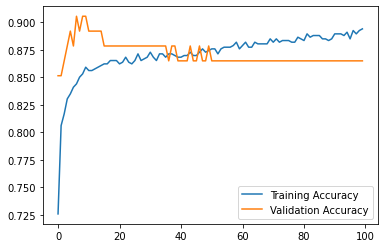

In [16]:
py.plot(results_1.accuracy, label='Training Accuracy')
py.plot(results_1.val_accuracy, label='Validation Accuracy')
py.legend()

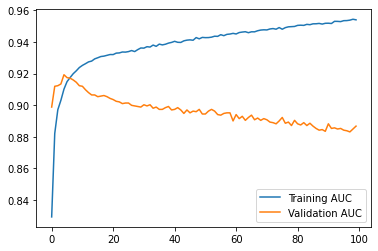

In [19]:
py.plot(results_1.auc_2, label='Training AUC')
py.plot(results_1.val_auc_2, label='Validation AUC')
py.legend()

In [37]:
model.load_weights(checkpoint_filepath)

In [38]:
model.evaluate(x_train, y_train, batch_size=Batch_Size)

23/23 [==============================] - 0s 3ms/step - loss: 0.3536 - auc_3: 0.9217 - accuracy: 0.8515


[0.35356515645980835, 0.9216829538345337, 0.8514986634254456]

In [39]:
model.evaluate(x_test, y_test, batch_size=Batch_Size)

6/6 [==============================] - 1s 135ms/step - loss: 0.3637 - auc_3: 0.9181 - accuracy: 0.8696


[0.3637128472328186, 0.9180550575256348, 0.8695651888847351]

In [40]:
predicts = model.predict(x_test) >= 0.5

6/6 [==============================] - 0s 34ms/step


In [45]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        91
           1       0.85      0.90      0.88        93

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [46]:
layers_parm = [(128, 'relu'), (64, 'relu'),
               (32, 'relu'), (16, 'relu'),
               (8, 'relu'), (4, 'relu')]
model = MyModel(layers_parm)
model.compile(loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(), 'accuracy'], optimizer='adam')

checkpoint_filepath = '/content/mydrive/MyDrive/Pi Diploma. C-E/Session 3/Tasks/Models/model_2.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)
results = CSVLogger("/content/mydrive/MyDrive/Pi Diploma. C-E/Session 3/Tasks/Models/results_2.csv", append=True)

model.fit(x_train, y_train, epochs=Epochs, batch_size=Batch_Size, 
          callbacks=[results, checkpoint],
          validation_split= 0.1)

results_2 = pd.read_csv('/content/mydrive/MyDrive/Pi Diploma. C-E/Session 3/Tasks/Models/results_2.csv')

Epoch 1/100
21/21 [==============================] - 5s 40ms/step - loss: 0.6741 - auc_4: 0.7639 - accuracy: 0.7121 - val_loss: 0.6222 - val_auc_4: 0.9031 - val_accuracy: 0.8378
Epoch 2/100
21/21 [==============================] - 1s 52ms/step - loss: 0.5676 - auc_4: 0.8483 - accuracy: 0.7985 - val_loss: 0.4466 - val_auc_4: 0.9050 - val_accuracy: 0.8649
Epoch 3/100
21/21 [==============================] - 0s 12ms/step - loss: 0.4206 - auc_4: 0.8913 - accuracy: 0.8197 - val_loss: 0.3805 - val_auc_4: 0.9141 - val_accuracy: 0.8919
Epoch 4/100
21/21 [==============================] - 0s 9ms/step - loss: 0.3714 - auc_4: 0.9143 - accuracy: 0.8303 - val_loss: 0.3749 - val_auc_4: 0.9031 - val_accuracy: 0.8784
Epoch 5/100
21/21 [==============================] - 0s 9ms/step - loss: 0.3496 - auc_4: 0.9211 - accuracy: 0.8500 - val_loss: 0.3813 - val_auc_4: 0.9031 - val_accuracy: 0.8784
Epoch 6/100
21/21 [==============================] - 0s 24ms/step - loss: 0.3384 - auc_4: 0.9251 - accuracy: 0.8

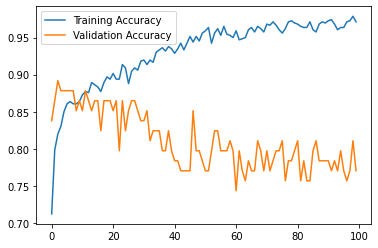

In [49]:
py.plot(results_2.accuracy, label='Training Accuracy')
py.plot(results_2.val_accuracy, label='Validation Accuracy')
py.legend()

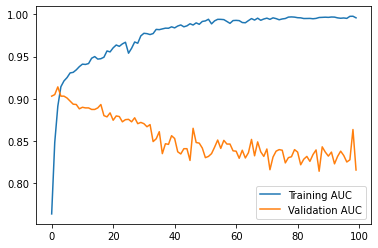

In [50]:
py.plot(results_2.auc_4, label='Training AUC')
py.plot(results_2.val_auc_4, label='Validation AUC')
py.legend()

In [53]:
model.load_weights(checkpoint_filepath)

In [54]:
model.evaluate(x_train, y_train, batch_size=Batch_Size)

23/23 [==============================] - 2s 98ms/step - loss: 0.3791 - auc_4: 0.9133 - accuracy: 0.8392


[0.3791487216949463, 0.9133436679840088, 0.8392370343208313]

In [55]:
model.evaluate(x_test, y_test, batch_size=Batch_Size)

6/6 [==============================] - 0s 4ms/step - loss: 0.3659 - auc_4: 0.9173 - accuracy: 0.8750


[0.36585789918899536, 0.9172869324684143, 0.875]

In [56]:
predicts_2 = model.predict(x_test) >= 0.5

6/6 [==============================] - 1s 144ms/step


In [57]:
print(classification_report(y_test, predicts_2))

              precision    recall  f1-score   support

           0       0.91      0.82      0.87        91
           1       0.84      0.92      0.88        93

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [58]:
layers_parm = [(128, 'relu'), (64, 'relu'),(64, 'tanh')]
model = MyModel(layers_parm)


model.compile(loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(), 'accuracy'], optimizer='adam')

checkpoint_filepath = '/content/mydrive/MyDrive/Pi Diploma. C-E/Session 3/Tasks/Models/model_3.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)
results = CSVLogger("/content/mydrive/MyDrive/Pi Diploma. C-E/Session 3/Tasks/Models/results_3.csv", append=True)

model.fit(x_train, y_train, epochs=Epochs, batch_size=Batch_Size, 
          callbacks=[results, checkpoint],
          validation_split= 0.1)

results_3 = pd.read_csv('/content/mydrive/MyDrive/Pi Diploma. C-E/Session 3/Tasks/Models/results_3.csv')

Epoch 1/100
21/21 [==============================] - 2s 17ms/step - loss: 0.5416 - auc_5: 0.8345 - accuracy: 0.7606 - val_loss: 0.4041 - val_auc_5: 0.9134 - val_accuracy: 0.8919
Epoch 2/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4050 - auc_5: 0.8961 - accuracy: 0.8227 - val_loss: 0.3763 - val_auc_5: 0.9207 - val_accuracy: 0.8919
Epoch 3/100
21/21 [==============================] - 1s 6ms/step - loss: 0.3645 - auc_5: 0.9168 - accuracy: 0.8409 - val_loss: 0.3613 - val_auc_5: 0.9196 - val_accuracy: 0.8919
Epoch 4/100
21/21 [==============================] - 0s 19ms/step - loss: 0.3452 - auc_5: 0.9234 - accuracy: 0.8591 - val_loss: 0.3834 - val_auc_5: 0.9134 - val_accuracy: 0.8784
Epoch 5/100
21/21 [==============================] - 0s 11ms/step - loss: 0.3396 - auc_5: 0.9265 - accuracy: 0.8485 - val_loss: 0.3678 - val_auc_5: 0.9086 - val_accuracy: 0.8649
Epoch 6/100
21/21 [==============================] - 0s 13ms/step - loss: 0.3224 - auc_5: 0.9333 - accuracy: 0.8

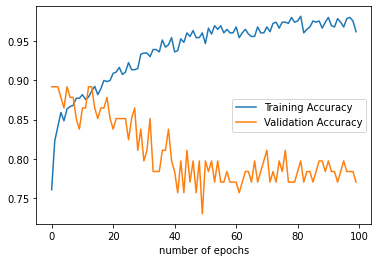

In [59]:
py.plot(results_3.accuracy, label='Training Accuracy')
py.plot(results_3.val_accuracy, label='Validation Accuracy')
py.xlabel('number of epochs')
py.legend()

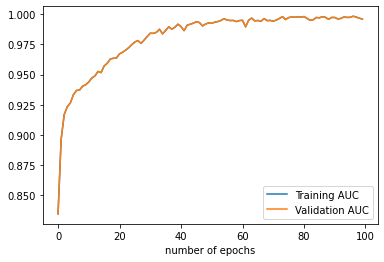

In [61]:
py.plot(results_3.auc_5, label='Training AUC')
py.plot(results_3.auc_5, label='Validation AUC')
py.xlabel('number of epochs')
py.legend()

In [62]:
model.load_weights(checkpoint_filepath)

In [63]:
model.evaluate(x_train, y_train, batch_size=Batch_Size)

23/23 [==============================] - 0s 3ms/step - loss: 0.4215 - auc_5: 0.8952 - accuracy: 0.8283


[0.4215445816516876, 0.8952449560165405, 0.8283378481864929]

In [64]:
model.evaluate(x_test, y_test, batch_size=Batch_Size)

6/6 [==============================] - 0s 7ms/step - loss: 0.4034 - auc_5: 0.9081 - accuracy: 0.8587


[0.4033642113208771, 0.9081295132637024, 0.8586956262588501]

In [65]:
predicts_3 = model.predict(x_test) >= 0.5

6/6 [==============================] - 0s 20ms/step


In [66]:
print(classification_report(y_test, predicts_3))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        91
           1       0.83      0.90      0.87        93

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [78]:
layers_parm = [(128, 'relu'), (128, 'relu'), (64, 'relu'),
               (32, 'tanh'), (16, 'relu'),
               (8, 'relu'), (4, 'relu')]
model = MyModel(layers_parm)
model.compile(loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(), 'accuracy'], optimizer='adam')

checkpoint_filepath = '/content/mydrive/MyDrive/Pi Diploma. C-E/Session 3/Tasks/Models/model_4.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)
results = CSVLogger("/content/mydrive/MyDrive/Pi Diploma. C-E/Session 3/Tasks/Models/results_4.csv", append=True)

model.fit(x_train, y_train, epochs=Epochs, batch_size=Batch_Size, 
          callbacks=[results, checkpoint],
          validation_split= 0.1)

results_4 = pd.read_csv('/content/mydrive/MyDrive/Pi Diploma. C-E/Session 3/Tasks/Models/results_4.csv')

Epoch 1/100
21/21 [==============================] - 4s 20ms/step - loss: 0.6123 - auc_6: 0.8248 - accuracy: 0.5727 - val_loss: 0.5624 - val_auc_6: 0.8999 - val_accuracy: 0.5135
Epoch 2/100
21/21 [==============================] - 0s 8ms/step - loss: 0.5181 - auc_6: 0.8799 - accuracy: 0.6727 - val_loss: 0.5402 - val_auc_6: 0.9148 - val_accuracy: 0.8514
Epoch 3/100
21/21 [==============================] - 1s 48ms/step - loss: 0.4942 - auc_6: 0.8841 - accuracy: 0.8333 - val_loss: 0.5394 - val_auc_6: 0.9090 - val_accuracy: 0.8919
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 0.4817 - auc_6: 0.8829 - accuracy: 0.8485 - val_loss: 0.5556 - val_auc_6: 0.8611 - val_accuracy: 0.8378
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4808 - auc_6: 0.8787 - accuracy: 0.8364 - val_loss: 0.5426 - val_auc_6: 0.8947 - val_accuracy: 0.8919
Epoch 6/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4778 - auc_6: 0.8837 - accuracy: 0.847

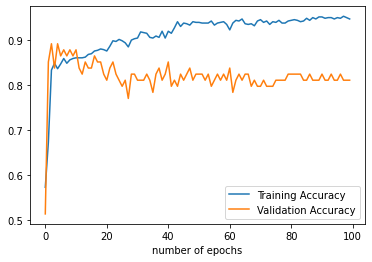

In [80]:
py.plot(results_4.accuracy, label='Training Accuracy')
py.plot(results_4.val_accuracy, label='Validation Accuracy')
py.xlabel('number of epochs')
py.legend()

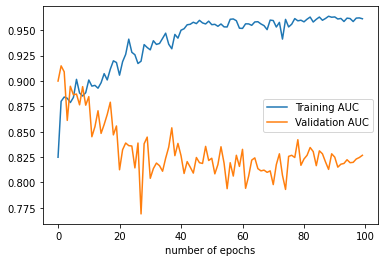

In [81]:
py.plot(results_4.auc_6, label='Training AUC')
py.plot(results_4.val_auc_6, label='Validation AUC')
py.xlabel('number of epochs')
py.legend()

In [82]:
model.evaluate(x_train, y_train, batch_size=Batch_Size)

23/23 [==============================] - 0s 4ms/step - loss: 0.2756 - auc_6: 0.9494 - accuracy: 0.9360


[0.2756389081478119, 0.949363648891449, 0.9359673261642456]

In [83]:
model.evaluate(x_test, y_test, batch_size=Batch_Size)

6/6 [==============================] - 1s 144ms/step - loss: 0.8268 - auc_6: 0.8580 - accuracy: 0.8207


[0.8267961740493774, 0.8580291271209717, 0.820652186870575]

In [84]:
print(classification_report(y_test, model.predict(x_test) >= 0.5))

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        91
           1       0.82      0.83      0.82        93

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



In [85]:
model.load_weights(checkpoint_filepath)

In [86]:
model.evaluate(x_train, y_train, batch_size=Batch_Size)

23/23 [==============================] - 1s 34ms/step - loss: 0.4870 - auc_6: 0.8967 - accuracy: 0.8556


[0.4869931638240814, 0.8967443704605103, 0.8555858135223389]

In [87]:
model.evaluate(x_test, y_test, batch_size=Batch_Size)

6/6 [==============================] - 0s 5ms/step - loss: 0.5207 - auc_6: 0.8994 - accuracy: 0.8587


[0.520717978477478, 0.8994446396827698, 0.8586956262588501]

In [88]:
print(classification_report(y_test, model.predict(x_test) >= 0.5))

6/6 [==============================] - 1s 165ms/step
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        91
           1       0.83      0.90      0.87        93

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

